In [1]:
!gdown 1ndehk0zJyTqq06II1mlV9zzwi1Gs0MDv

Downloading...
From: https://drive.google.com/uc?id=1ndehk0zJyTqq06II1mlV9zzwi1Gs0MDv
To: /content/filtered_data_with_loc_commit_count.csv
100% 46.6k/46.6k [00:00<00:00, 79.8MB/s]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top 3 ML SATD Types:
['MCM' 'Data Conf' 'MLKnow' 'MCR' 'DS Configuration' 'Weight Conf' 'MCC'
 'Proto' 'UMC ' 'MDepend' 'HP Conf' 'UMC' 'CDT' 'MLInter' 'Layer Conf']


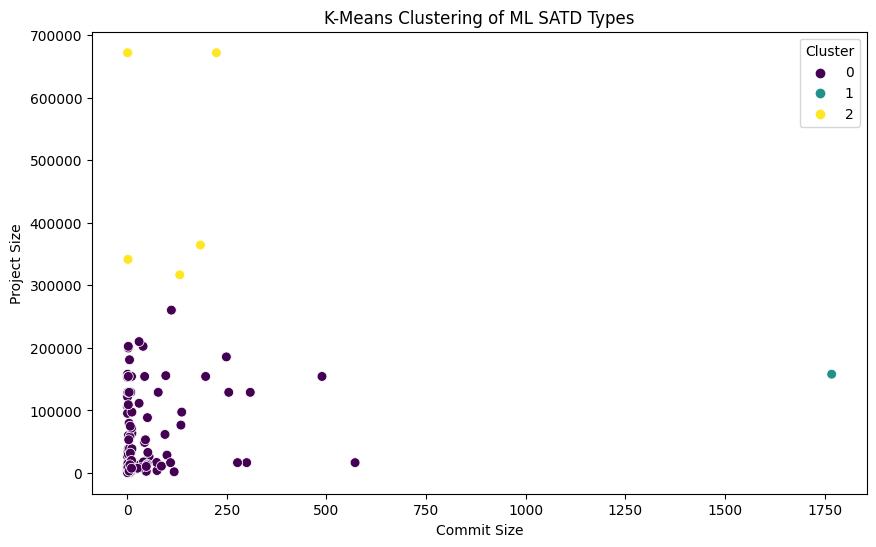

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
# Read data from CSV file
data = pd.read_csv("filtered_data_with_loc_commit_count.csv")

# Extract relevant columns
features = data[['Commit Size', 'Size']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)

# Choose the number of clusters (K)
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze results, identify top 3 clusters, and ML SATD types within those clusters
top_clusters = data.groupby('Cluster').size().sort_values(ascending=False).head(3)
top_ml_satd_types = data[data['Cluster'].isin(top_clusters.index)]['ML TD Type'].unique()

print("Top 3 ML SATD Types:")
print(top_ml_satd_types)

# Plot the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Commit Size', y='Size', hue='Cluster', data=data, palette='viridis', s=50)
plt.title('K-Means Clustering of ML SATD Types')
plt.xlabel('Commit Size')
plt.ylabel('Project Size')
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Label to ML SATD Name Mapping:
{0: 'MCM', 2: 'Data Conf', 1: 'MLKnow'}
Top 3 ML SATD Names:
Cluster
0    [MCM, Data Conf, MLKnow, MCR, DS Configuration...
1                                             [MLKnow]
2           [MLKnow, Data Conf, HP Conf, MDepend, MCR]
Name: ML TD Type, dtype: object


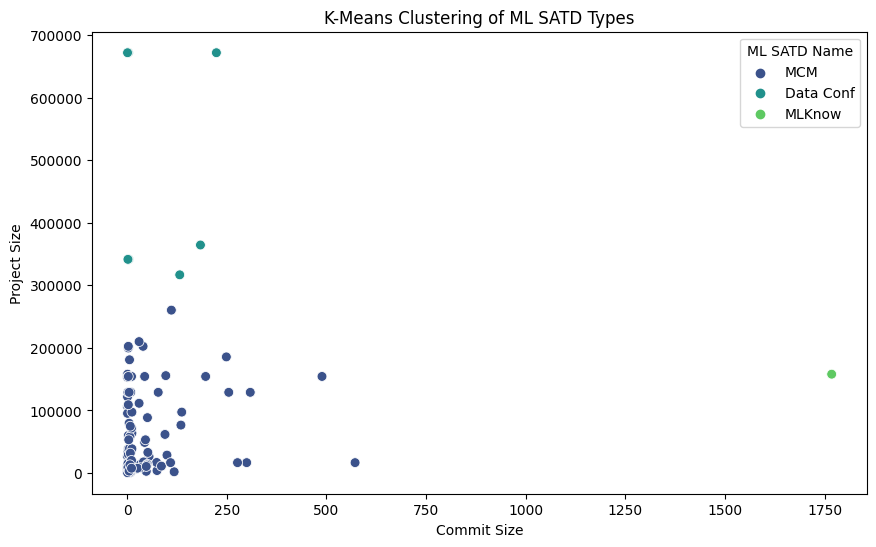

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV file
data = pd.read_csv("filtered_data_with_loc_commit_count.csv")

# Extract relevant columns
features = data[['Commit Size', 'Size', 'ML TD Type']]

# Impute missing values for numerical columns
numerical_features = features[['Commit Size', 'Size']]
imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = imputer.fit_transform(numerical_features)

# Combine imputed numerical features with the 'ML TD Type' column
features_imputed = pd.concat([pd.DataFrame(numerical_features_imputed, columns=['Commit Size', 'Size']), features['ML TD Type']], axis=1)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed[['Commit Size', 'Size']])

# Choose the number of clusters (K)
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Create a mapping between cluster labels and ML SATD names
cluster_mapping = {cluster_label: ml_satd_type for cluster_label, ml_satd_type in zip(data['Cluster'].unique(), data['ML TD Type'].unique())}

# Map cluster labels to ML SATD names
data['ML SATD Name'] = data['Cluster'].map(cluster_mapping)

# Print the mapping
print("Cluster Label to ML SATD Name Mapping:")
print(cluster_mapping)

# Print the top 3 ML SATD Names
top_ml_satd_names = data.groupby('Cluster')['ML TD Type'].unique().apply(lambda x: x.tolist()).head(3)
print("Top 3 ML SATD Names:")
print(top_ml_satd_names)

# Plot the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Commit Size', y='Size', hue='ML SATD Name', data=data, palette='viridis', s=50)
plt.title('K-Means Clustering of ML SATD Types')
plt.xlabel('Commit Size')
plt.ylabel('Project Size')
plt.show()
